In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
df1 = pd.read_csv('AirPassengers.csv', parse_dates= ['Month'])

In [19]:
df1.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [20]:
df1.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [26]:
df1 = pd.read_csv('AirPassengers.csv', parse_dates= ['Month'], index_col='Month')

In [27]:
df1.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [30]:
df1['1951-04-01' : '1952-03-01']

,#Passengers
Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [32]:
df1.loc['1960-05-01']

#Passengers    472
Name: 1960-05-01 00:00:00, dtype: int64

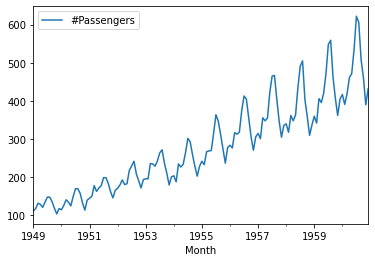

In [34]:
df1.plot()
plt.show()

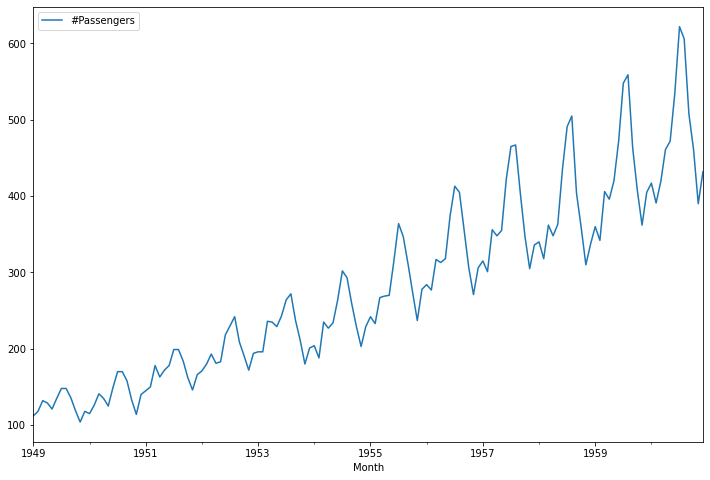

In [41]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
df1.plot()
plt.show()

In [44]:
df1_mul_decompose = seasonal_decompose(df1, model='multiplicative')

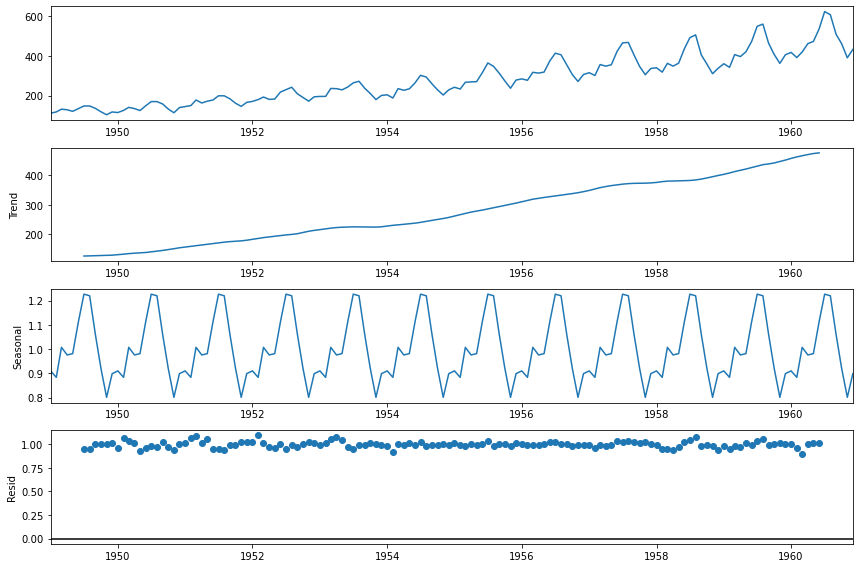

In [46]:
df1_mul_decompose.plot()
plt.show()

In [48]:
df1_log = df1.copy()

In [50]:
df1_log['#Passengers']= np.log(df1)

In [51]:
df1_log['#Passengers']

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

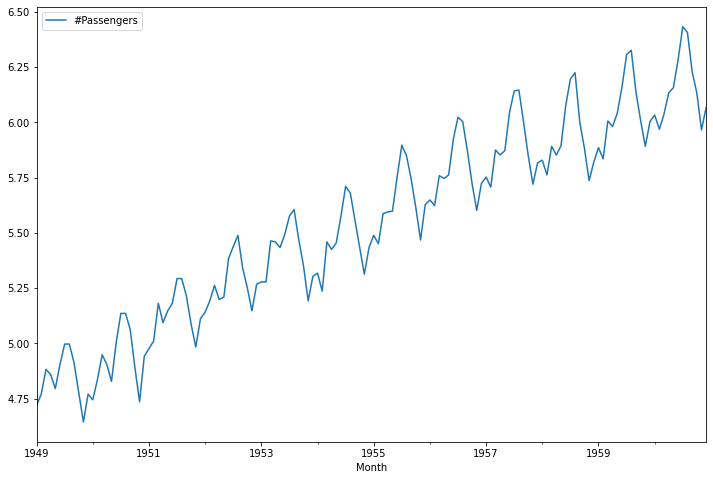

In [53]:
df1_log.plot()
plt.show()

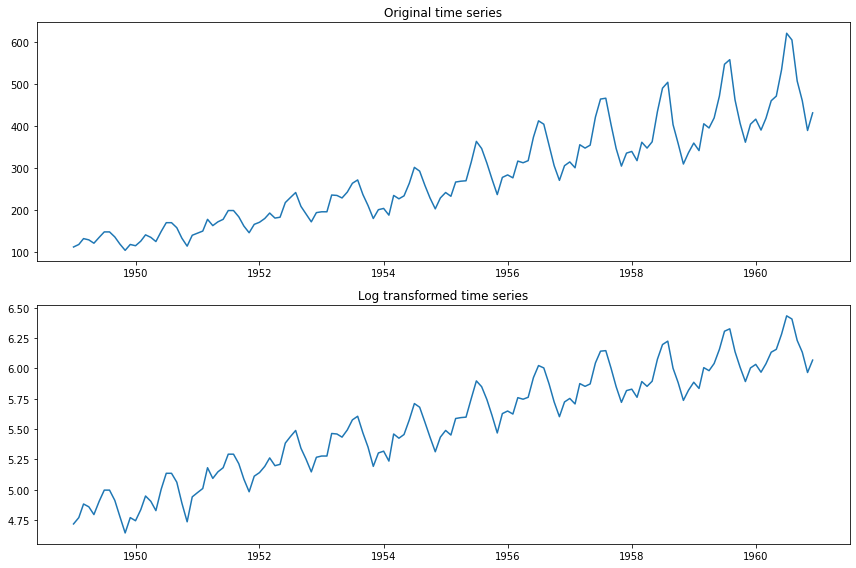

In [60]:
plt.subplot(2,1,1)
plt.plot(df1)
plt.title('Original time series')


plt.subplot(2,1,2)
plt.plot(df1_log)
plt.title('Log transformed time series')
plt.tight_layout()